## KNN from scratch

K nearest neighbors is a lazy algorithm, instead of training the model, it just memorize the data and make prediction by the majority vote of its K nearest neighbors. The algorithm complexity depends on the parameter `kind` in np.argsort, generally it is `O(n*logn)`

In [1]:
from __future__ import print_function, division
import numpy as np

class KNN():
    def __init__(self, k=5):
        self.k = k

    def _major_class(self, labels):
        count = np.bincount(labels)
        return np.argmax(count)

    def predict(self, X_train, y_train, X_test):
        X_train = np.asarray(X_train)
        y_train = np.asarray(y_train)
        X_test = np.asarray(X_test)
        y_pred = np.empty(X_test.shape[0])
        for i, test_sample in enumerate(X_test):
            # get index of k nearest neighbor for each test sample
            k_idx = np.argsort([np.linalg.norm(test_sample-x) for x in X_train])[:self.k]
            # knn labels
            k_nearest_neighbors = np.array([y_train[i] for i in k_idx])
            y_pred[i] = self._major_class(k_nearest_neighbors)
        return y_pred


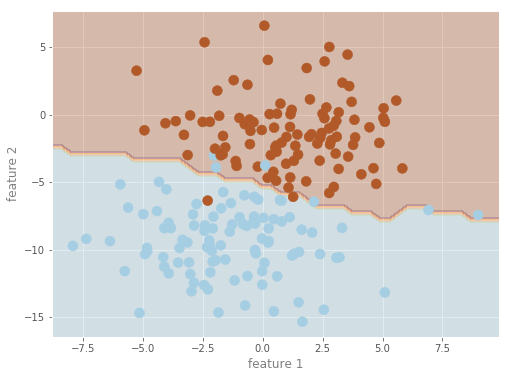

In [2]:
## Model and visulization

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
plt.style.use('ggplot')

X_train, y_train = make_blobs(n_samples=200, centers=2,
                  random_state=2, cluster_std=2.50)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='Paired', zorder=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 50)
y = np.linspace(ylim[0], ylim[1], 50)
yy, xx = np.meshgrid(y, x)
X_test = np.vstack([xx.ravel(), yy.ravel()]).T

zz = KNN(k=5).predict(X_train, y_train, X_test)
zz = zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap='Paired', alpha=0.3, zorder=1)
plt.show()

A bit slow, but it works.